#### Библиотеки

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
import time
from scipy.stats import boxcox, boxcox_normmax
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import shapiro
import statsmodels.api as sm


##### Декомпозиция и анализ остатков

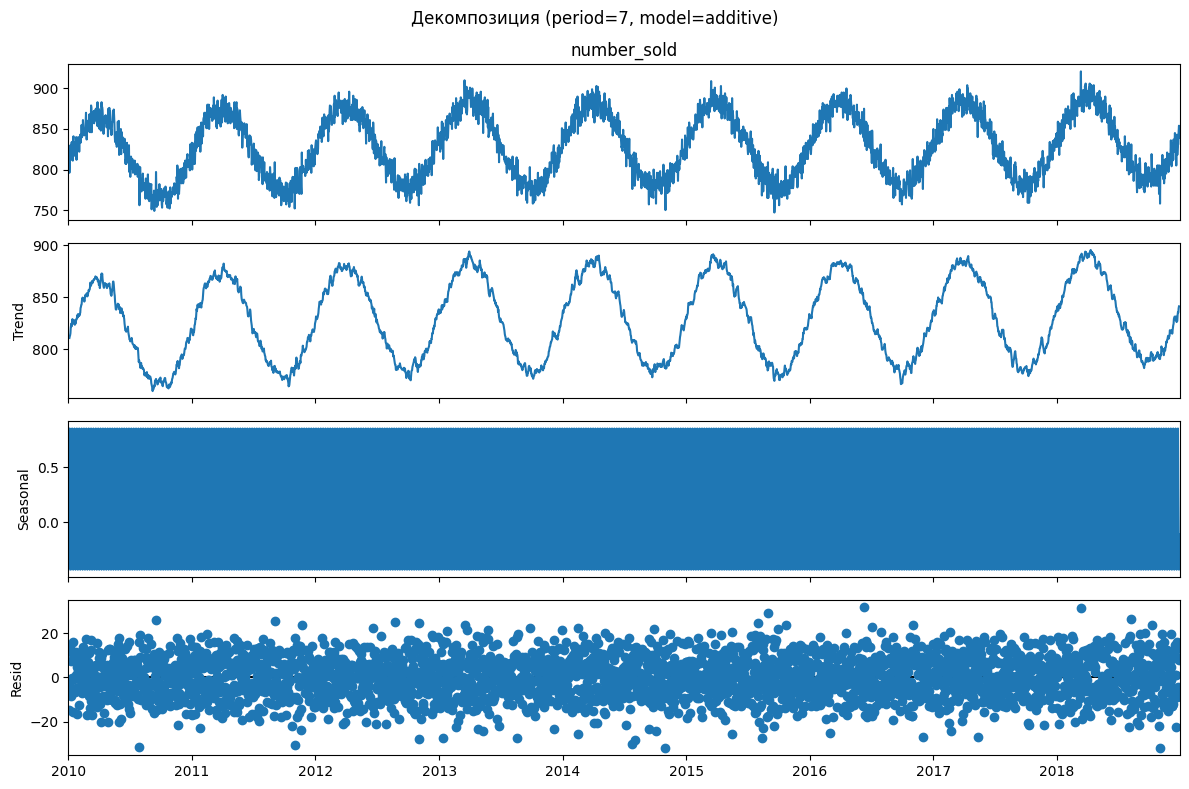

C:\Users\DmitrievMS\AppData\Local\Temp\ipykernel_31988\2981807071.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')


Период: 7, Модель: additive
Стационарность ADF: True
Стационарность KPSS: True
Нормальность: True
--------------------------------------------------


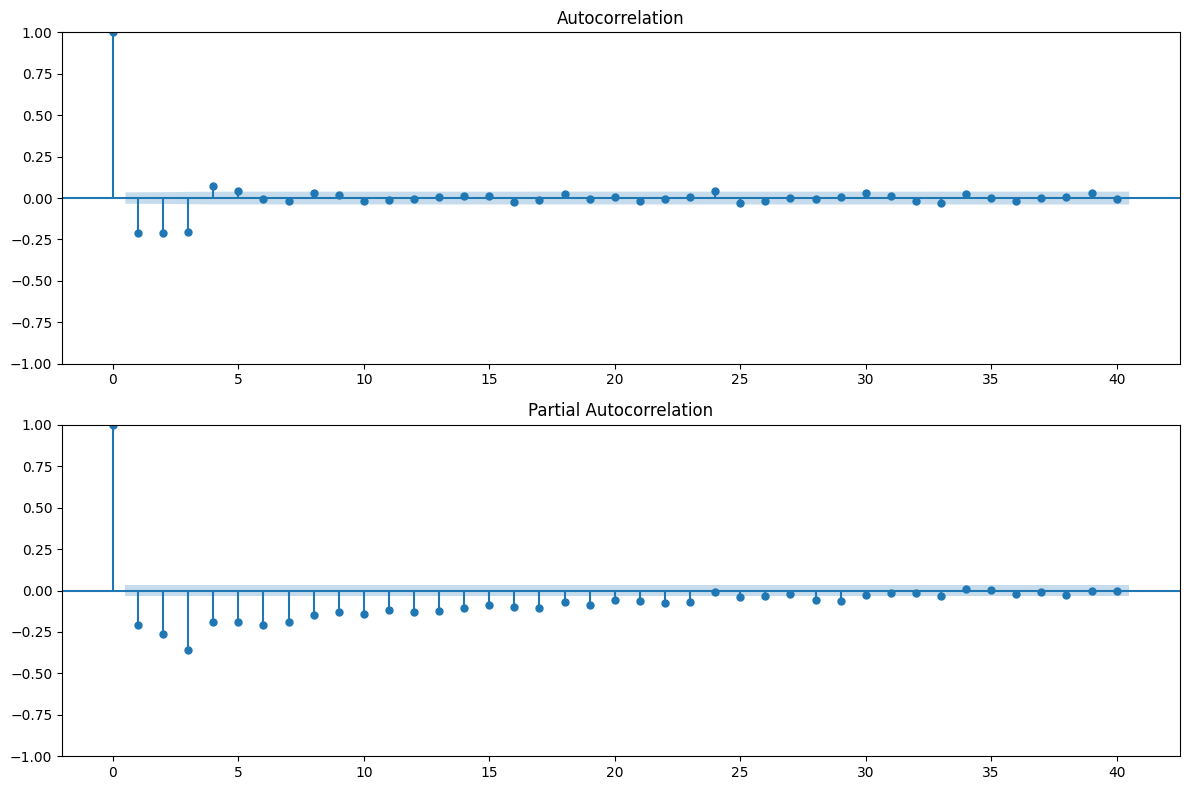

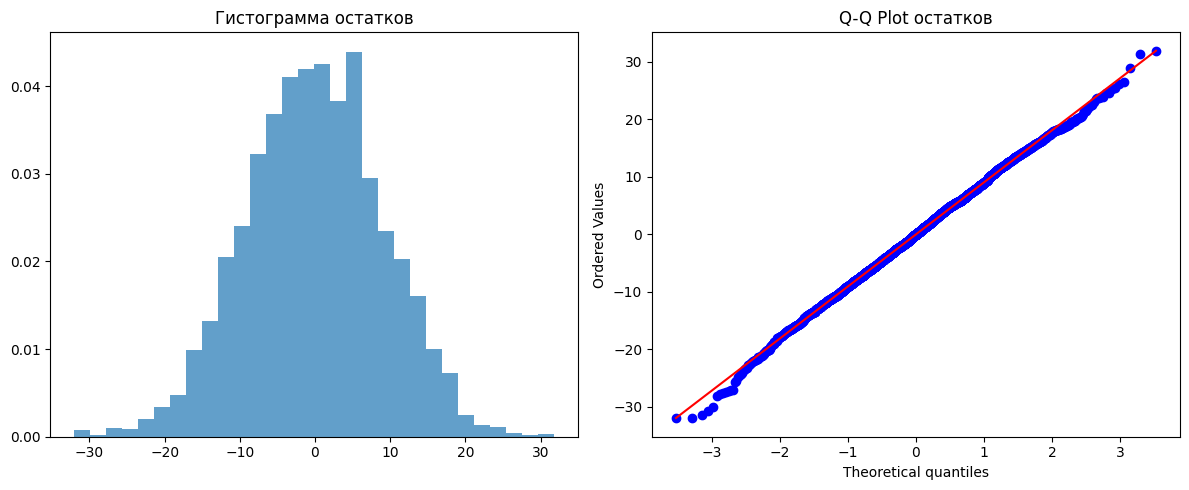

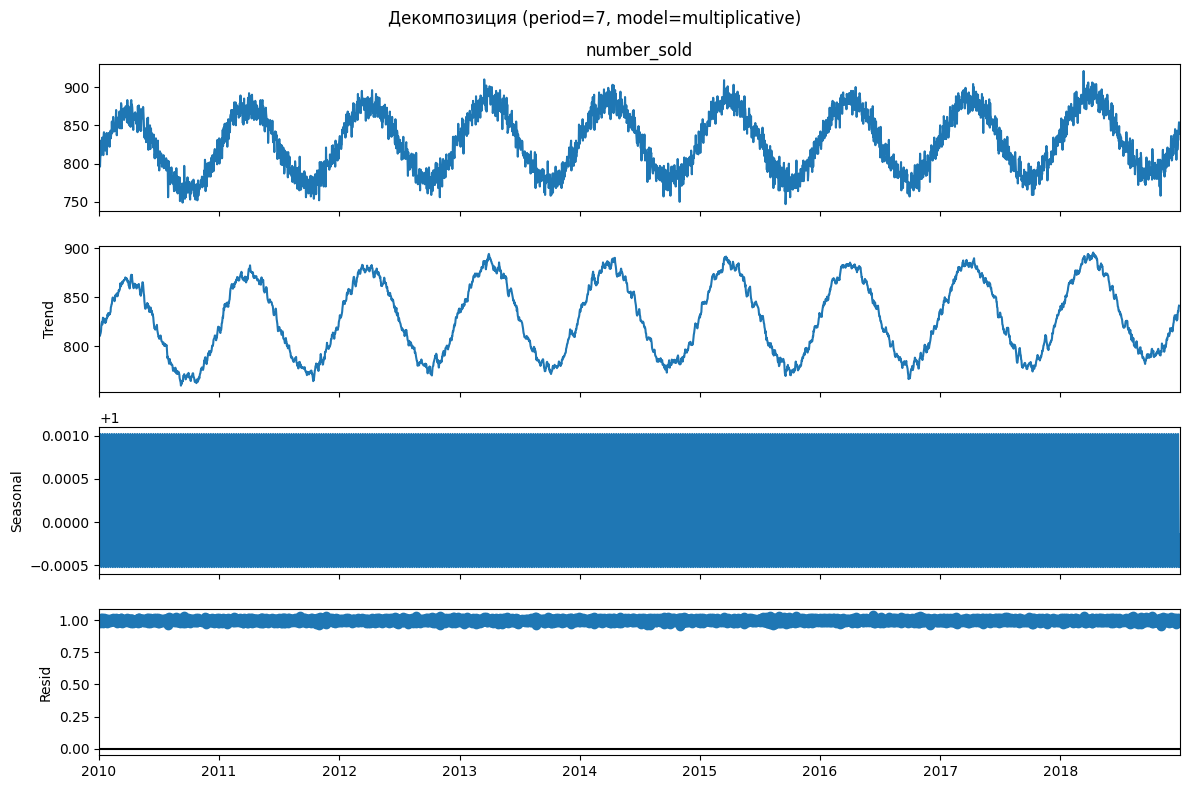

C:\Users\DmitrievMS\AppData\Local\Temp\ipykernel_31988\2981807071.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')


Период: 7, Модель: multiplicative
Стационарность ADF: True
Стационарность KPSS: True
Нормальность: True
--------------------------------------------------


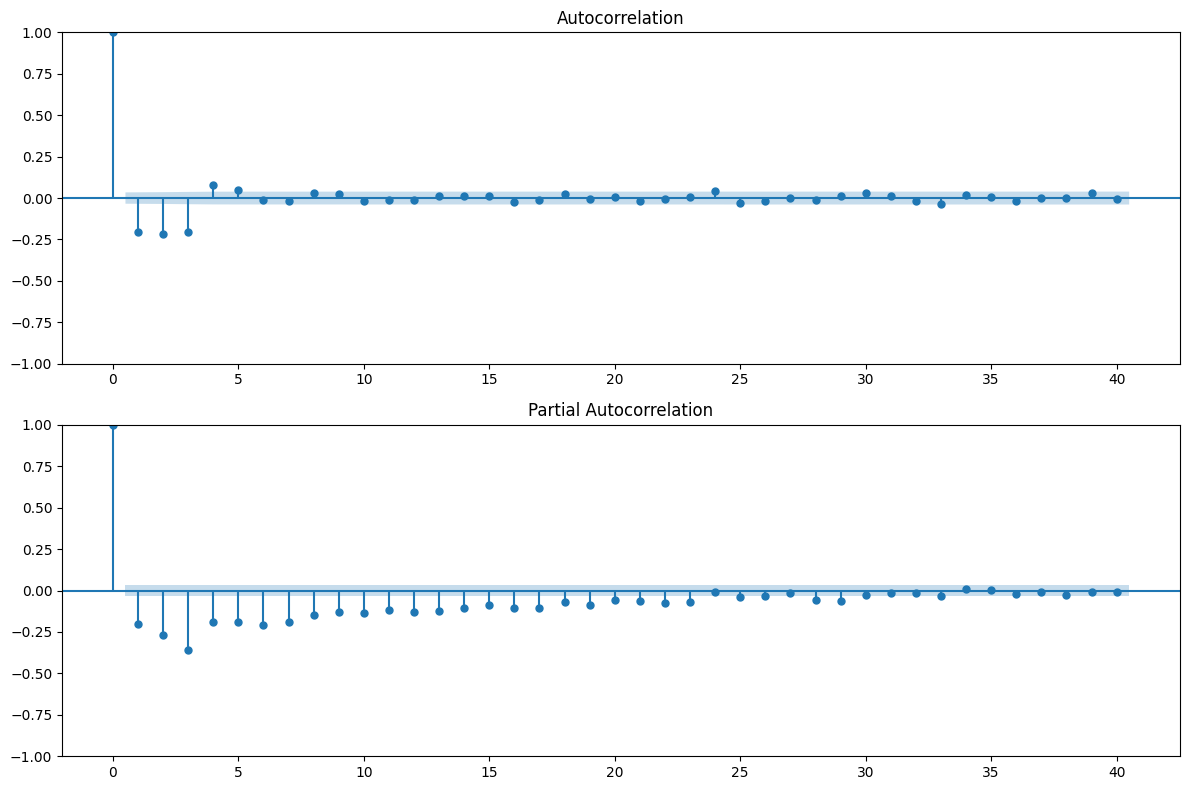

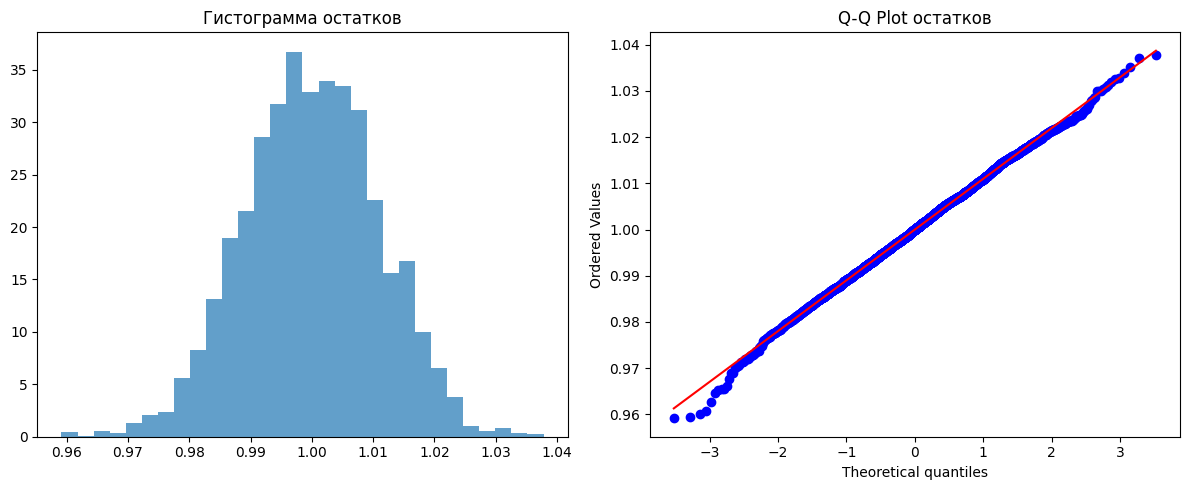

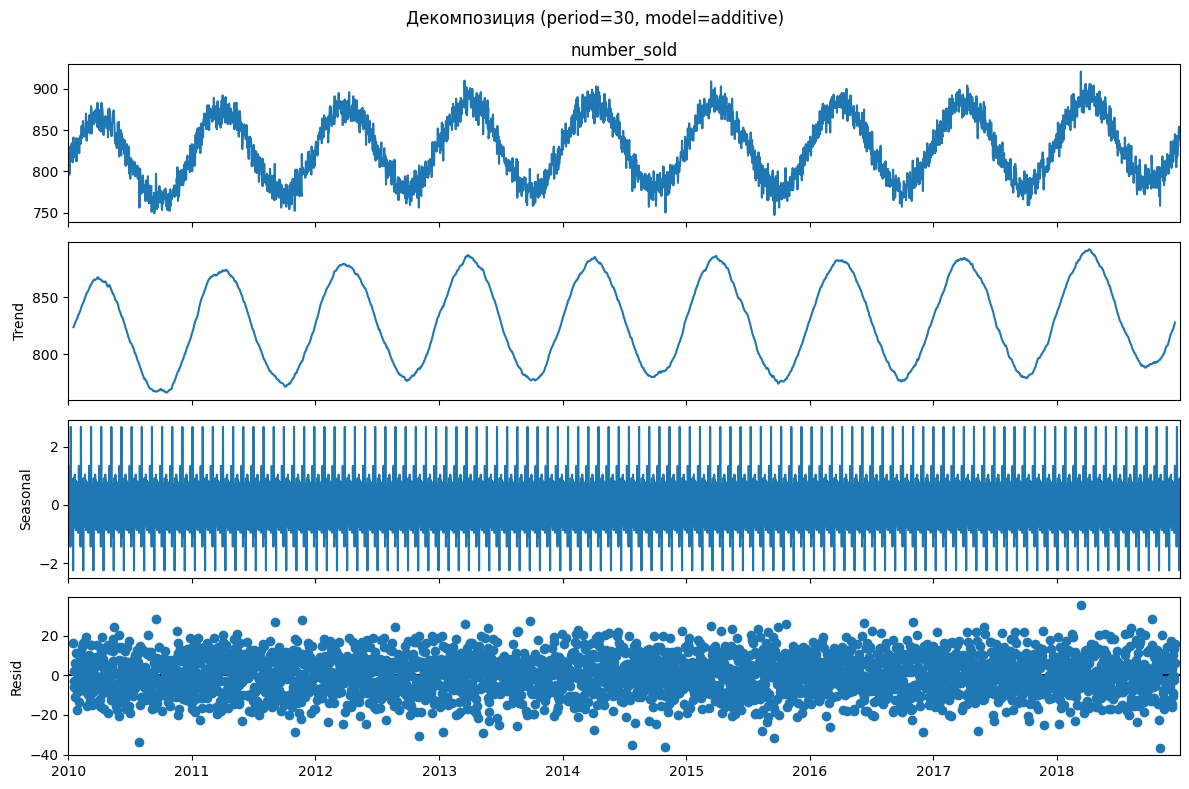

C:\Users\DmitrievMS\AppData\Local\Temp\ipykernel_31988\2981807071.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')


Период: 30, Модель: additive
Стационарность ADF: True
Стационарность KPSS: True
Нормальность: True
--------------------------------------------------


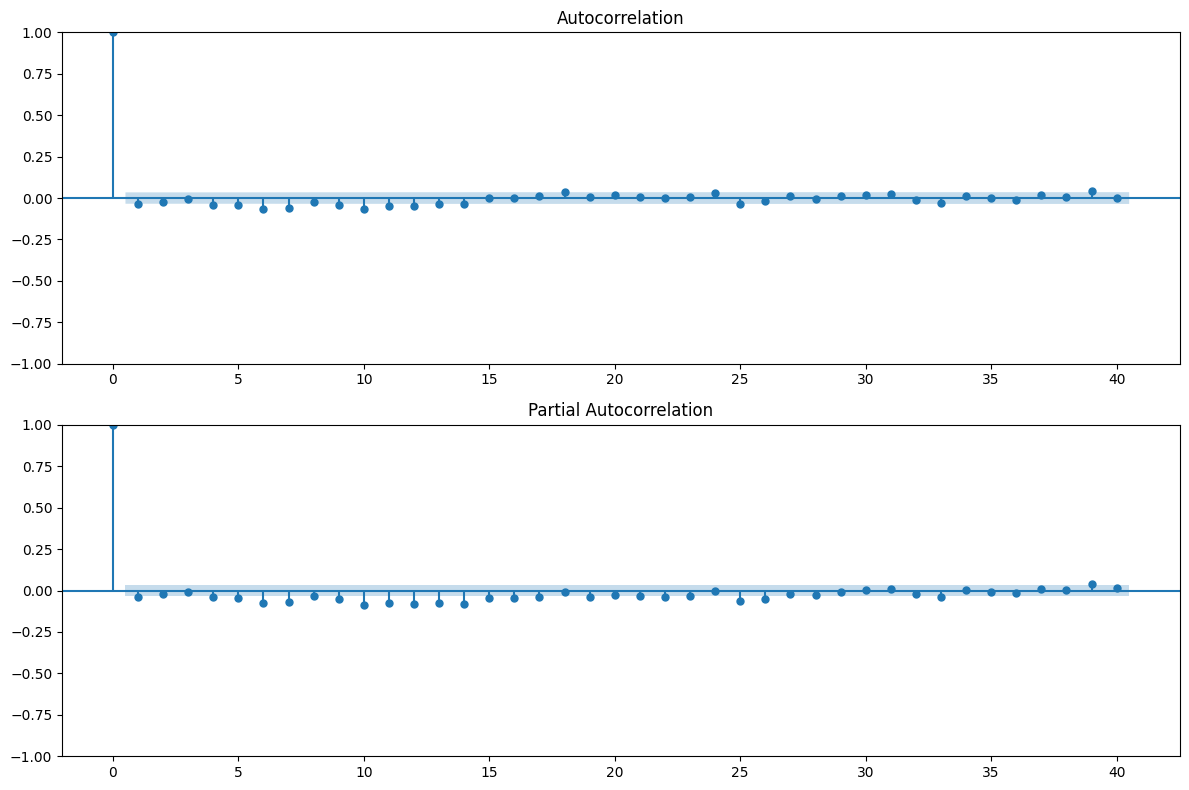

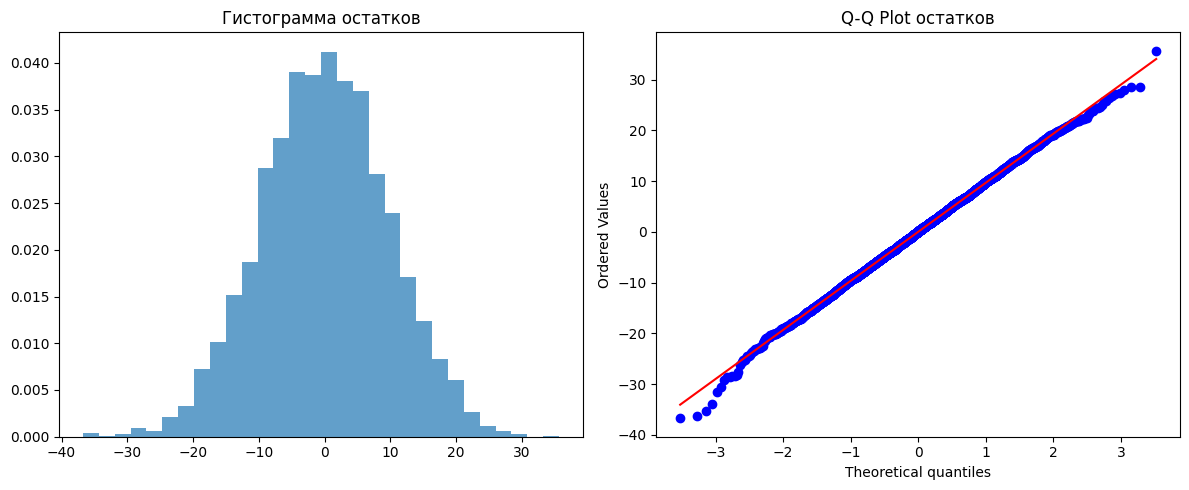

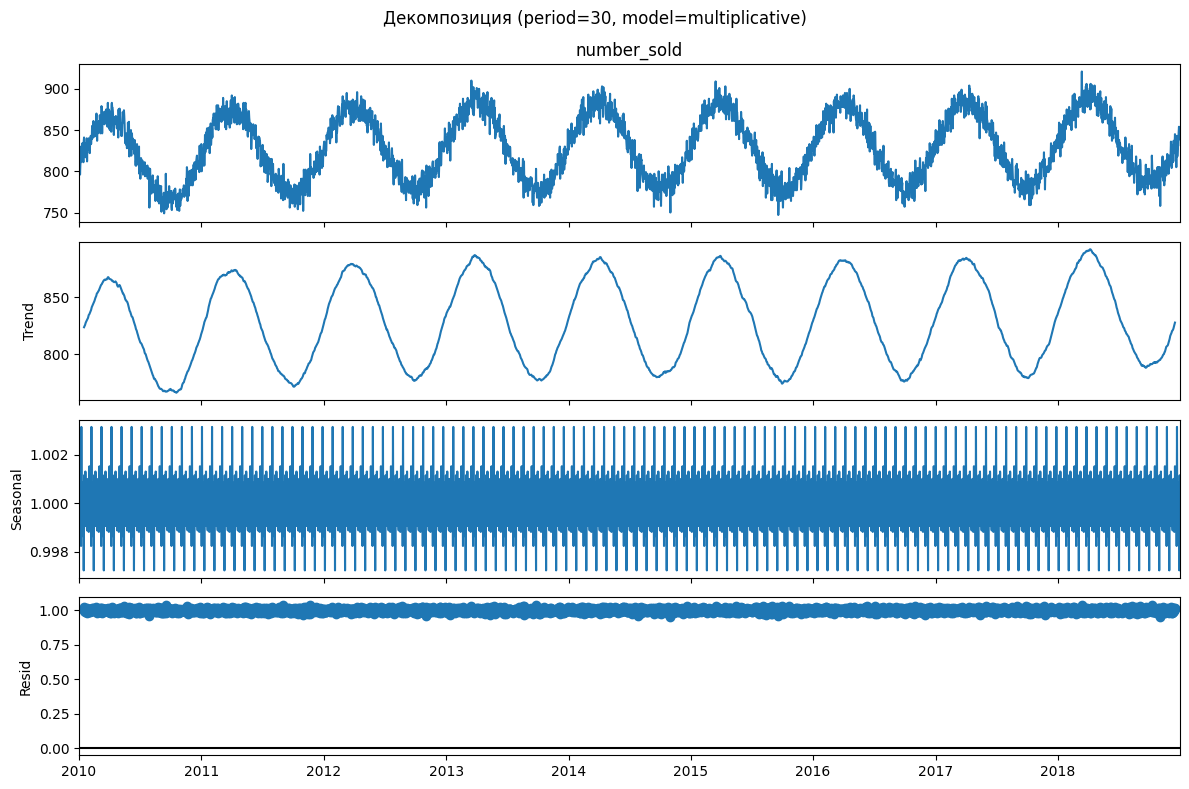

C:\Users\DmitrievMS\AppData\Local\Temp\ipykernel_31988\2981807071.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')


Период: 30, Модель: multiplicative
Стационарность ADF: True
Стационарность KPSS: True
Нормальность: True
--------------------------------------------------


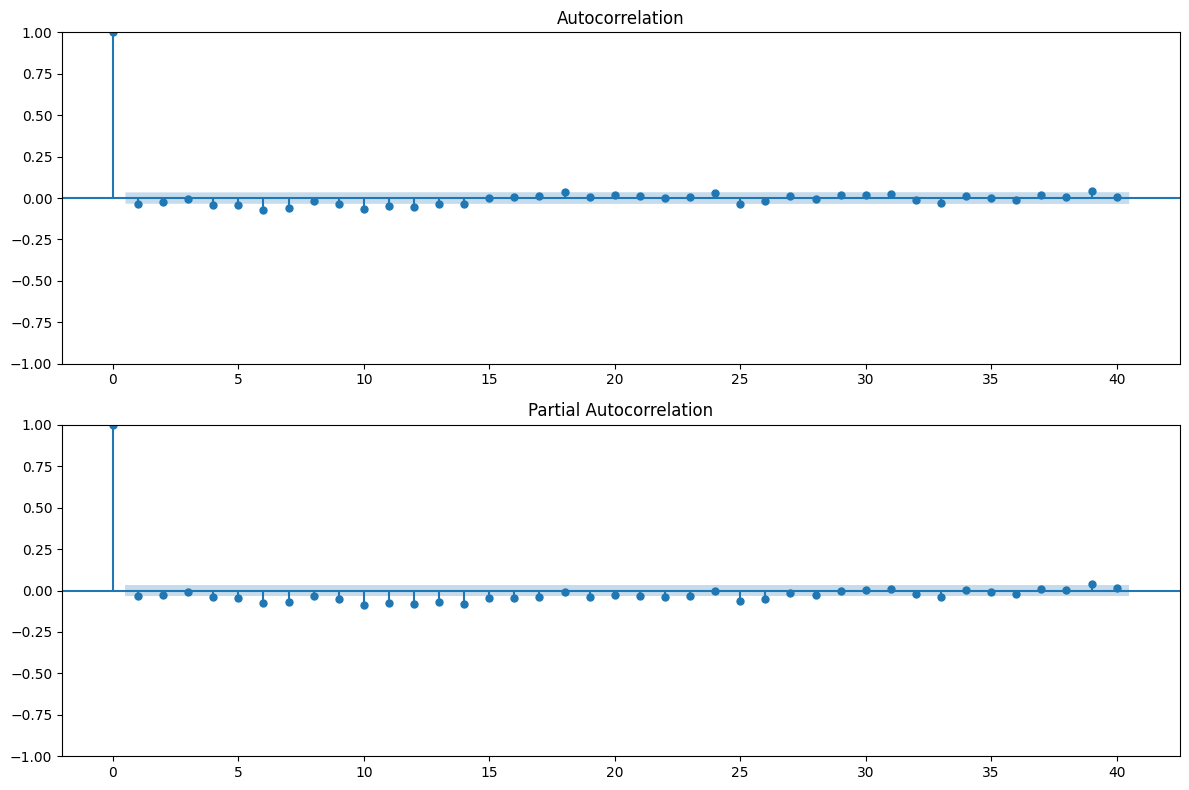

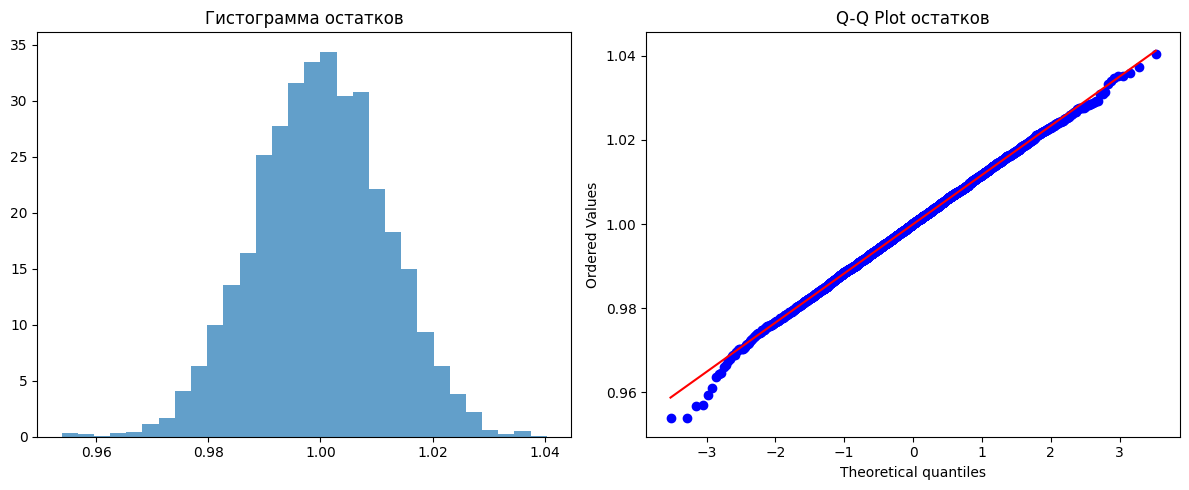

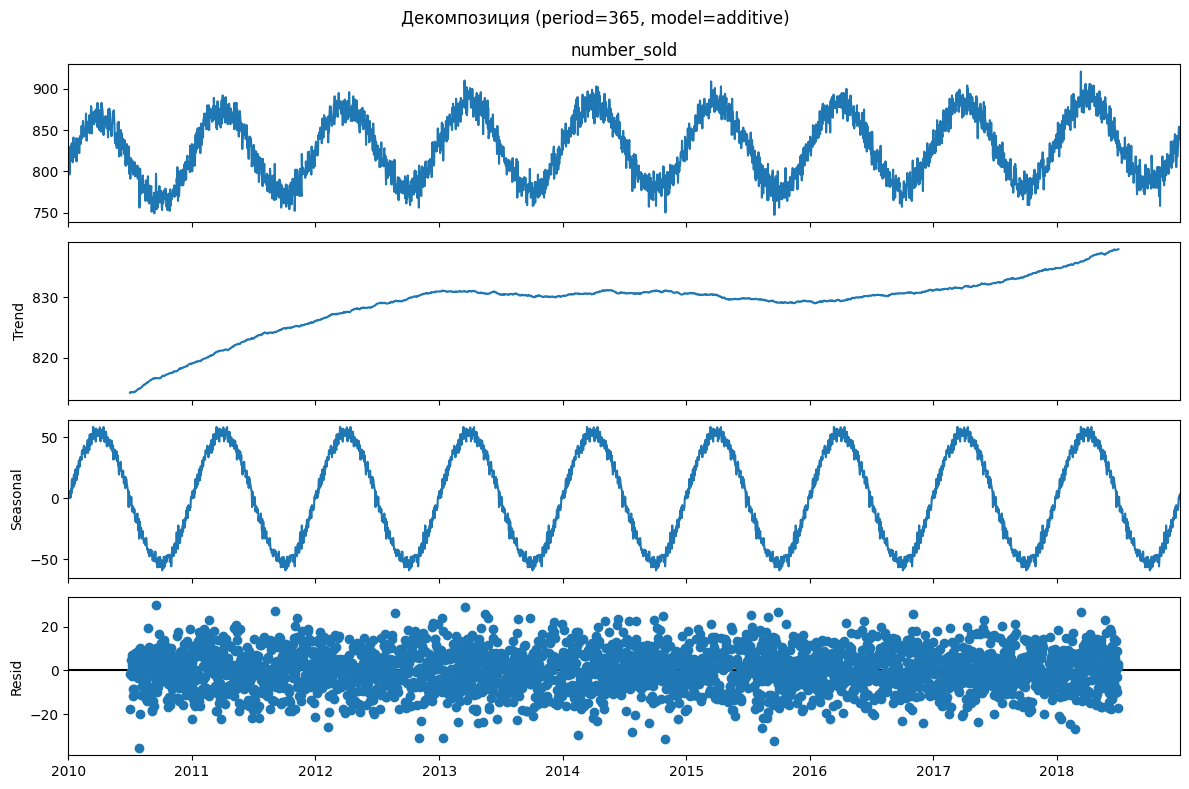

C:\Users\DmitrievMS\AppData\Local\Temp\ipykernel_31988\2981807071.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')


Период: 365, Модель: additive
Стационарность ADF: True
Стационарность KPSS: True
Нормальность: True
--------------------------------------------------


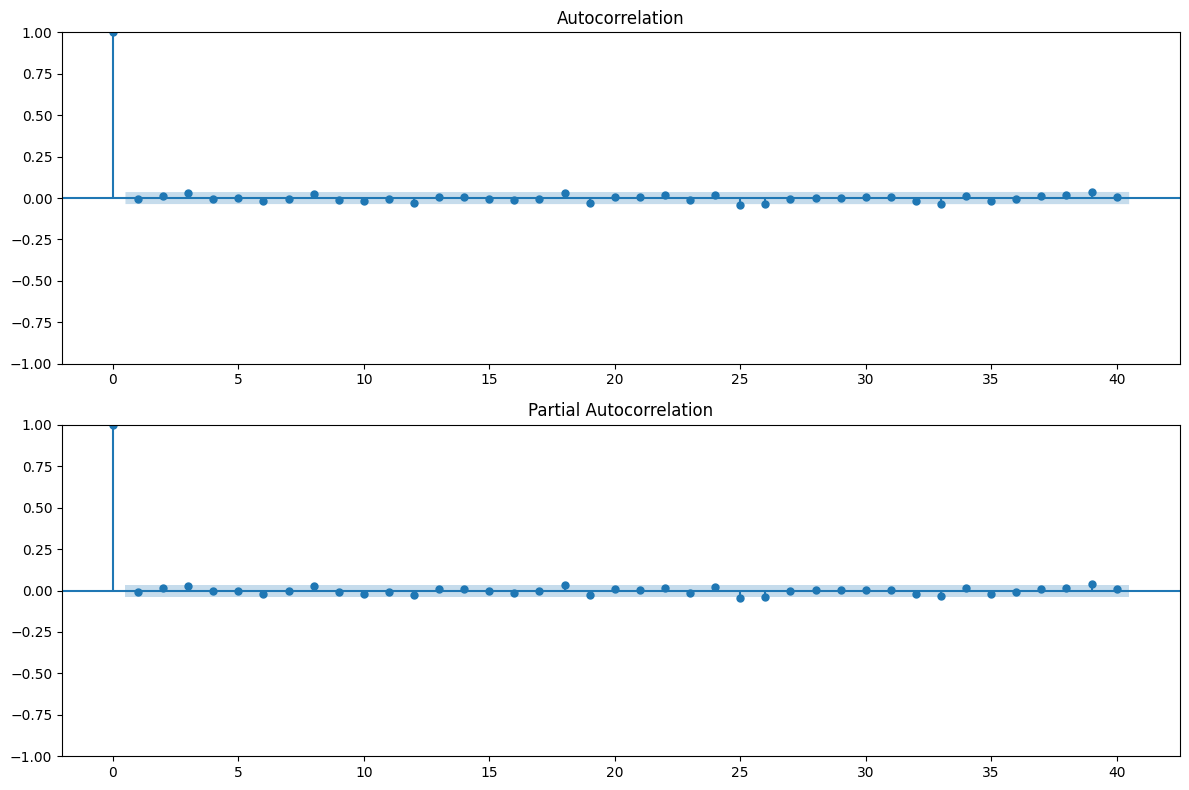

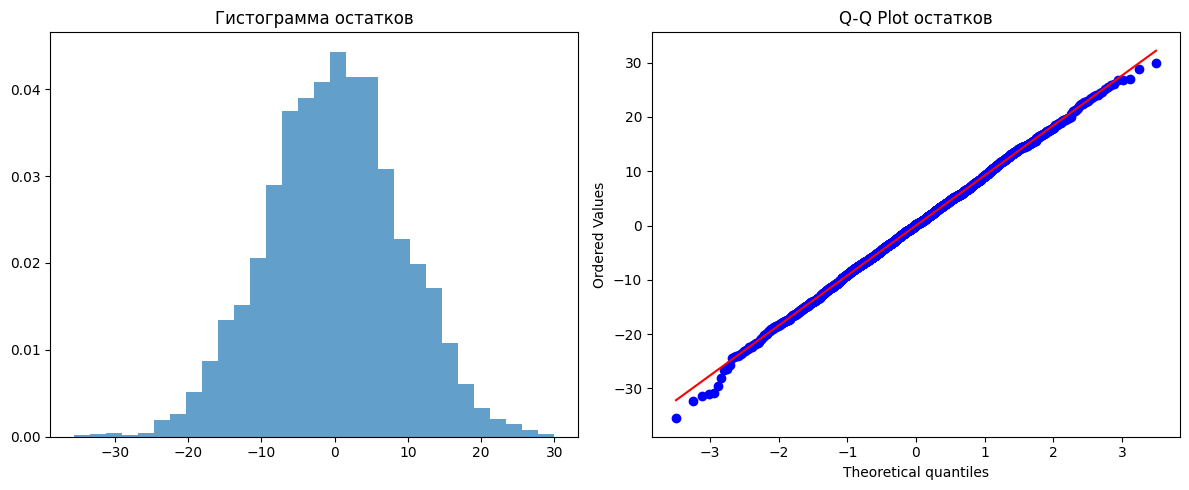

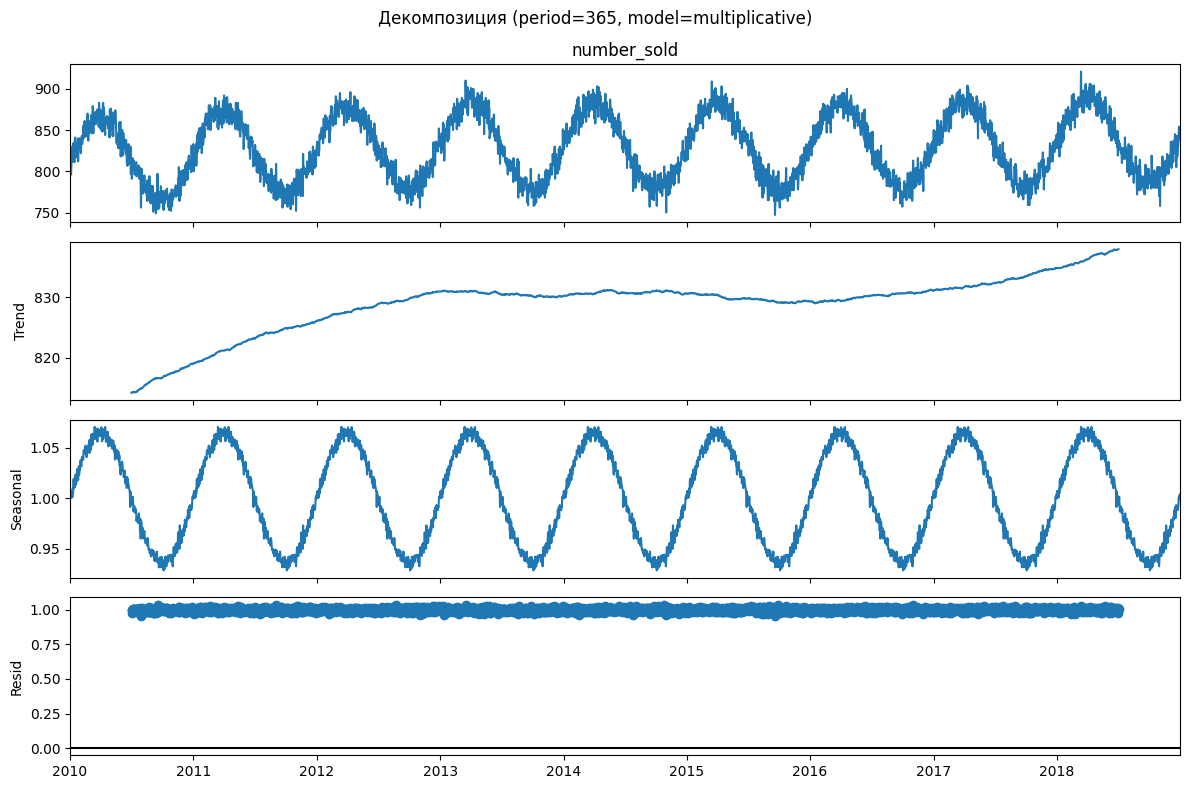

C:\Users\DmitrievMS\AppData\Local\Temp\ipykernel_31988\2981807071.py:16: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')


Период: 365, Модель: multiplicative
Стационарность ADF: True
Стационарность KPSS: True
Нормальность: True
--------------------------------------------------


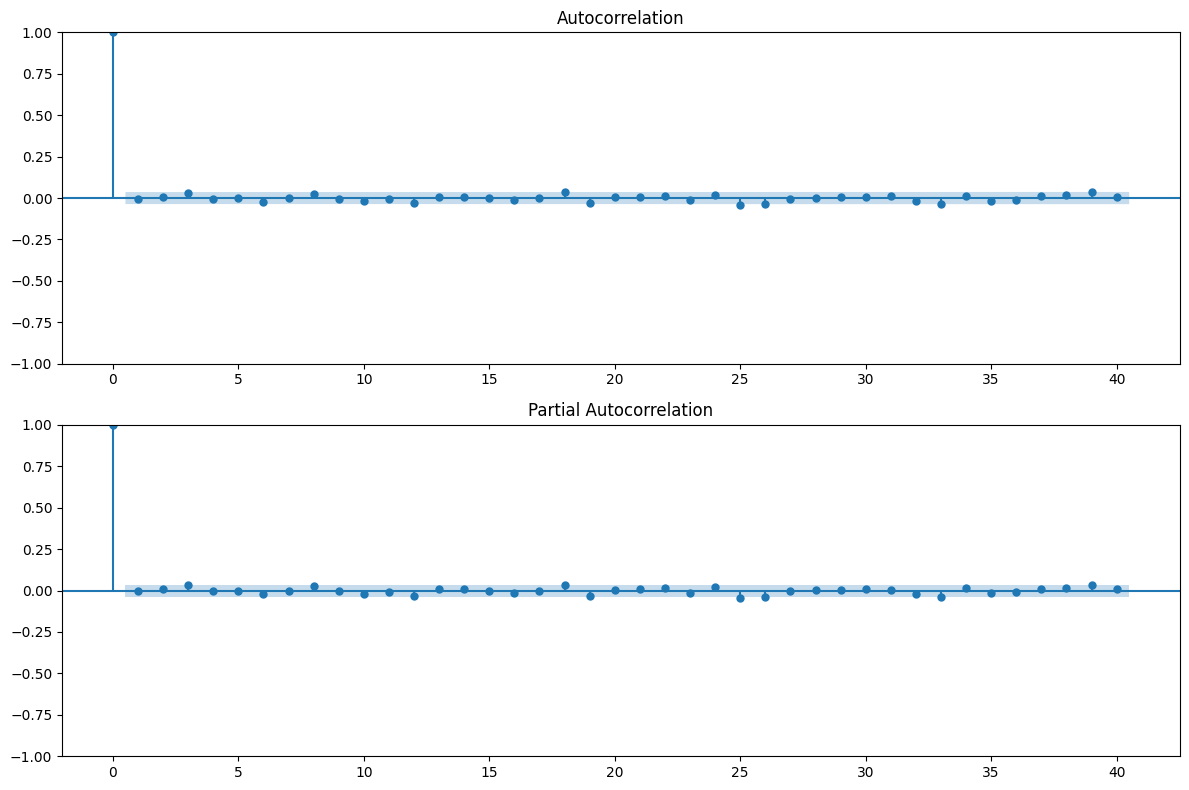

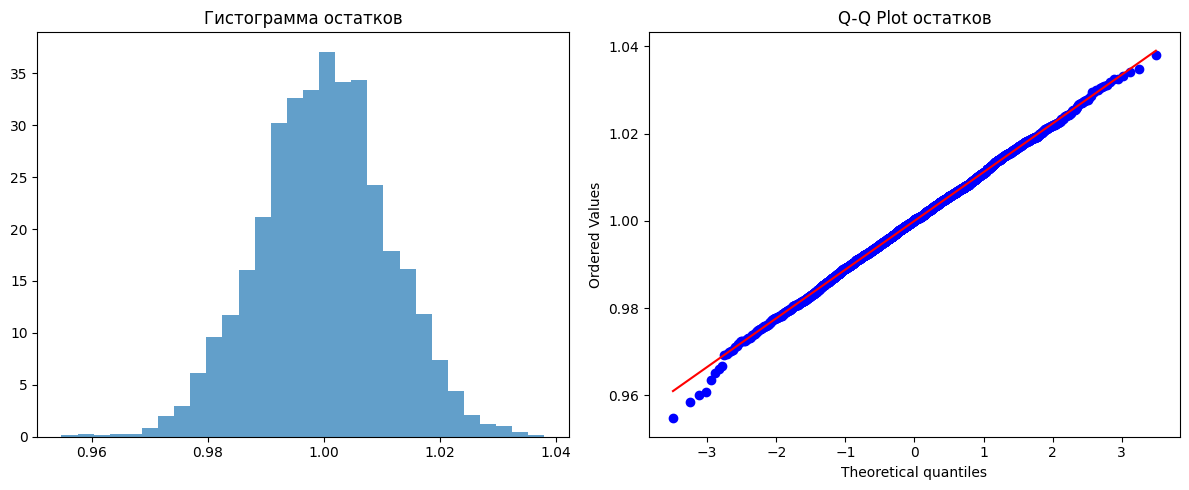

In [6]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

def perform_decomposition(series, period, model_type):
    decomposition = seasonal_decompose(series, model=model_type, period=period)
    return decomposition

def test_stationarity_adf(series):
    result = adfuller(series.dropna())
    return result[1] < 0.05

def test_stationarity_kpss(series):
    result = kpss(series.dropna(), regression='c')
    return result[1] > 0.05

def plot_acf_pacf_residuals(series):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    plot_acf(series.dropna(), ax=ax1, lags=40)
    plot_pacf(series.dropna(), ax=ax2, lags=40)
    plt.tight_layout()
    plt.show()

def plot_qq_histogram(series):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    series_dropped = series.dropna()
    ax1.hist(series_dropped, bins=30, density=True, alpha=0.7)
    ax1.set_title('Гистограмма остатков')
    
    stats.probplot(series_dropped, dist="norm", plot=ax2)
    ax2.set_title('Q-Q Plot остатков')
    
    plt.tight_layout()
    plt.show()

def analyze_residuals(residuals, period, model_type):
    residuals_clean = residuals.dropna()
    
    is_stationary_adf = test_stationarity_adf(residuals)
    is_stationary_kpss = test_stationarity_kpss(residuals)
    
    shapiro_test = stats.shapiro(residuals_clean)
    is_normal = shapiro_test[1] > 0.05
    
    return {
        'period': period,
        'model_type': model_type,
        'is_stationary_adf': is_stationary_adf,
        'is_stationary_kpss': is_stationary_kpss,
        'is_normal': is_normal
    }

def plot_decomposition(decomposition, title):
    fig = decomposition.plot()
    fig.set_size_inches(12, 8)
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

def main():
    df = load_data('data.csv')
    
    periods = [7, 30, 365]
    model_types = ['additive', 'multiplicative']
    
    all_results = []
    
    for period in periods:
        for model_type in model_types:
            decomposition = perform_decomposition(df['number_sold'], period, model_type)
            
            plot_decomposition(decomposition, f'Декомпозиция (period={period}, model={model_type})')
            
            result = analyze_residuals(decomposition.resid, period, model_type)
            all_results.append(result)
            
            print(f"Период: {period}, Модель: {model_type}")
            print(f"Стационарность ADF: {result['is_stationary_adf']}")
            print(f"Стационарность KPSS: {result['is_stationary_kpss']}")
            print(f"Нормальность: {result['is_normal']}")
            print("-" * 50)
            
            plot_acf_pacf_residuals(decomposition.resid)
            plot_qq_histogram(decomposition.resid)

if __name__ == "__main__":
    main()

#### Feature engineering

In [12]:
def create_temporal_features(df):
    """Создание временных признаков"""
    df_features = df.copy()
    
    # День недели, месяц, квартал
    df_features['day_of_week'] = df_features.index.dayofweek
    df_features['month'] = df_features.index.month
    df_features['quarter'] = df_features.index.quarter
    
    # Циклические признаки через sin/cos
    df_features['day_of_week_sin'] = np.sin(2 * np.pi * df_features['day_of_week'] / 7)
    df_features['day_of_week_cos'] = np.cos(2 * np.pi * df_features['day_of_week'] / 7)
    
    return df_features

def create_lag_features(df, target_col='number_sold'):
    """Создание лаговых признаков"""
    df_lags = df.copy()
    
    df_lags['lag_1'] = df_lags[target_col].shift(1)
    df_lags['lag_7'] = df_lags[target_col].shift(7)
    df_lags['lag_30'] = df_lags[target_col].shift(30)
    
    return df_lags

def create_rolling_features(df, target_col='number_sold'):
    """Создание скользящих статистик"""
    df_rolling = df.copy()
    
    windows = [7, 30, 90]
    
    for window in windows:
        df_rolling[f'rolling_mean_{window}'] = df_rolling[target_col].rolling(window=window).mean()
        df_rolling[f'rolling_std_{window}'] = df_rolling[target_col].rolling(window=window).std()
        df_rolling[f'rolling_min_{window}'] = df_rolling[target_col].rolling(window=window).min()
        df_rolling[f'rolling_max_{window}'] = df_rolling[target_col].rolling(window=window).max()
    
    return df_rolling

def create_volatility_features(df, target_col='number_sold'):
    """Создание признаков волатильности"""
    df_vol = df.copy()
    
    windows = [7, 30, 90]
    
    for window in windows:
        df_vol[f'rolling_cv_{window}'] = (df_vol[target_col].rolling(window=window).std() / 
                                        df_vol[target_col].rolling(window=window).mean())
    
    return df_vol

def main_feature_engineering(df):
    """Основная функция создания признаков"""
    df_features = df.copy()
    
    df_features = create_temporal_features(df_features)
    df_features = create_lag_features(df_features)
    df_features = create_rolling_features(df_features)
    df_features = create_volatility_features(df_features)
    
    df_features = df_features.dropna()
    
    # Сохранение данных с признаками
    df_features.to_csv('data_with_features.csv')
    
    return df_features

if __name__ == "__main__":
    df = pd.read_csv('data.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    df_with_features = main_feature_engineering(df)
    print(df_with_features.head())

            number_sold  day_of_week  month  quarter  day_of_week_sin  \
Date                                                                    
2010-03-31        875.0            2      3        1         0.974928   
2010-04-01        852.0            3      4        2         0.433884   
2010-04-02        873.0            4      4        2        -0.433884   
2010-04-03        850.0            5      4        2        -0.974928   
2010-04-04        854.0            6      4        2        -0.781831   

            day_of_week_cos  lag_1  lag_7  lag_30  rolling_mean_7  ...  \
Date                                                               ...   
2010-03-31        -0.222521  866.0  874.0   848.0      867.714286  ...   
2010-04-01        -0.900969  875.0  870.0   861.0      865.142857  ...   
2010-04-02        -0.900969  852.0  864.0   848.0      866.428571  ...   
2010-04-03        -0.222521  873.0  854.0   868.0      865.857143  ...   
2010-04-04         0.623490  850.0  883.0   

#### Многошаговое прогнозирование

In [13]:
def recursive_strategy(model, X_train, y_train, X_test, h):
    """Рекурсивная стратегия: одна модель → итеративное использование прогнозов"""
    model.fit(X_train, y_train)
    predictions = []
    current_features = X_test.iloc[0:1].copy()
    
    for i in range(h):
        pred = model.predict(current_features)[0]
        predictions.append(pred)
        
        if i < h - 1:
            current_features = current_features.shift(1, axis=1)
            current_features.iloc[0, 0] = pred
    
    return np.array(predictions)

def direct_strategy(model, X_train, y_train, X_test, h):
    """Прямая стратегия: отдельная модель для каждого шага t+1, ..., t+h"""
    predictions = []
    
    for step in range(1, h + 1):
        y_train_shifted = y_train.shift(-step).dropna()
        X_train_aligned = X_train.iloc[:len(y_train_shifted)]
        
        model.fit(X_train_aligned, y_train_shifted)
        pred = model.predict(X_test.iloc[0:1])[0]
        predictions.append(pred)
    
    return np.array(predictions)

def hybrid_strategy(model, X_train, y_train, X_test, h):
    """Гибридная стратегия: рекурсивная для ближайших шагов, прямая — для дальних"""
    switch_point = h // 2
    predictions = []
    
    # Рекурсивная для первых switch_point шагов
    recursive_preds = recursive_strategy(model, X_train, y_train, X_test, switch_point)
    predictions.extend(recursive_preds)
    
    # Прямая для оставшихся шагов
    for step in range(switch_point + 1, h + 1):
        y_train_shifted = y_train.shift(-step).dropna()
        X_train_aligned = X_train.iloc[:len(y_train_shifted)]
        
        model.fit(X_train_aligned, y_train_shifted)
        pred = model.predict(X_test.iloc[0:1])[0]
        predictions.append(pred)
    
    return np.array(predictions)

def compare_strategies(X_train, y_train, X_test, y_test, h=7):
    """Сравнение стратегий по точности и времени вычислений"""
    strategies = {
        'Рекурсивная': recursive_strategy,
        'Прямая': direct_strategy,
        'Гибридная': hybrid_strategy
    }
    
    results = {}
    
    for name, strategy in strategies.items():
        start_time = time.time()
        
        model = LinearRegression()
        predictions = strategy(model, X_train, y_train, X_test, h)
        
        execution_time = time.time() - start_time
        
        # Точность (MAE, RMSE на каждом шаге)
        mae_per_step = [mean_absolute_error([y_test[i]], [predictions[i]]) for i in range(h)]
        rmse_per_step = [np.sqrt(mean_squared_error([y_test[i]], [predictions[i]])) for i in range(h)]
        
        # Накопление ошибки
        error_accumulation = np.cumsum(mae_per_step)
        
        results[name] = {
            'predictions': predictions,
            'mae_per_step': mae_per_step,
            'rmse_per_step': rmse_per_step,
            'execution_time': execution_time,
            'error_accumulation': error_accumulation
        }
        
        print(f"{name} стратегия:")
        print(f"MAE по шагам: {[f'{x:.4f}' for x in mae_per_step]}")
        print(f"RMSE по шагам: {[f'{x:.4f}' for x in rmse_per_step]}")
        print(f"Время вычислений: {execution_time:.4f} сек")
        print(f"Накопление ошибки: {[f'{x:.4f}' for x in error_accumulation]}")
        print("-" * 50)
    
    return results

def main():
    # Загрузка данных с признаками
    df = pd.read_csv('data_with_features.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    # Подготовка данных для многопшагового прогнозирования
    target_col = 'number_sold'
    h = 7
    
    split_idx = int(len(df) * 0.8)
    train_data = df.iloc[:split_idx]
    test_data = df.iloc[split_idx:split_idx + h]
    
    X_train = train_data.drop(columns=[target_col])
    y_train = train_data[target_col]
    X_test = test_data.drop(columns=[target_col])
    y_test = test_data[target_col].values
    
    # Сравнение стратегий
    results = compare_strategies(X_train, y_train, X_test, y_test, h)
    
    return results

if __name__ == "__main__":
    results = main()

Рекурсивная стратегия:
MAE по шагам: ['2.7889', '923335.1642', '382567.2355', '903815.5024', '924535.8935', '199579.0809', '94734.4161']
RMSE по шагам: ['2.7889', '923335.1642', '382567.2355', '903815.5024', '924535.8935', '199579.0809', '94734.4161']
Время вычислений: 0.0260 сек
Накопление ошибки: ['2.7889', '923337.9531', '1305905.1887', '2209720.6911', '3134256.5847', '3333835.6656', '3428570.0817']
--------------------------------------------------
Прямая стратегия:
MAE по шагам: ['2.0934', '4.8431', '1.1507', '4.1413', '2.7653', '8.7510', '3.8989']
RMSE по шагам: ['2.0934', '4.8431', '1.1507', '4.1413', '2.7653', '8.7510', '3.8989']
Время вычислений: 0.0251 сек
Накопление ошибки: ['2.0934', '6.9365', '8.0872', '12.2285', '14.9938', '23.7449', '27.6438']
--------------------------------------------------
Гибридная стратегия:
MAE по шагам: ['2.7889', '923335.1642', '382567.2355', '4.1413', '2.7653', '8.7510', '3.8989']
RMSE по шагам: ['2.7889', '923335.1642', '382567.2355', '4.1413'

#### Кросс-валидация временных рядов

Среднее качество по фолдам:
Скользящее окно:
  MAE: 68.8394 ± 33.6382
  RMSE: 95.8056 ± 53.1405
  Стабильность MAE: ухудшается
------------------------------
Расширяющееся окно:
  MAE: 7.2886 ± 0.1903
  RMSE: 9.1044 ± 0.1691
  Стабильность MAE: ухудшается
------------------------------
TimeSeriesSplit:
  MAE: 7.2908 ± 0.1443
  RMSE: 9.1022 ± 0.0891
  Стабильность MAE: ухудшается
------------------------------


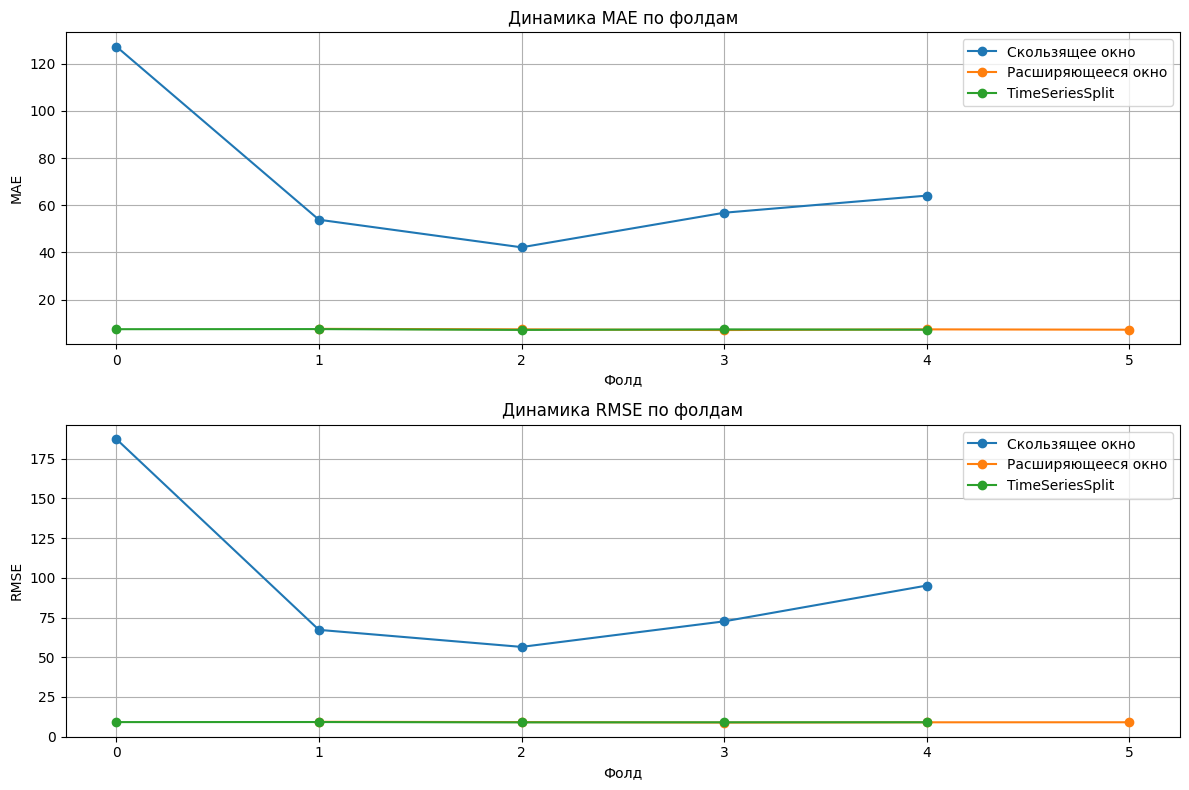

In [15]:
def sliding_window_cv(X, y, model, n_splits=5, train_size=100):
    """Скользящее окно: фиксированная длина обучения, сдвиг по времени"""
    metrics = []
    
    for i in range(n_splits):
        start_train = i
        end_train = start_train + train_size
        start_test = end_train
        end_test = start_test + len(X) // n_splits
        
        if end_test > len(X):
            break
            
        X_train = X.iloc[start_train:end_train]
        y_train = y.iloc[start_train:end_train]
        X_test = X.iloc[start_test:end_test]
        y_test = y.iloc[start_test:end_test]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        metrics.append({'fold': i, 'mae': mae, 'rmse': rmse})
    
    return pd.DataFrame(metrics)

def expanding_window_cv(X, y, model, n_splits=5):
    """Расширяющееся окно: обучение растёт со временем"""
    metrics = []
    
    for i in range(1, n_splits + 1):
        split_point = len(X) * i // (n_splits + 1)
        
        X_train = X.iloc[:split_point]
        y_train = y.iloc[:split_point]
        X_test = X.iloc[split_point:split_point + len(X) // n_splits]
        y_test = y.iloc[split_point:split_point + len(X) // n_splits]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        metrics.append({'fold': i, 'mae': mae, 'rmse': rmse})
    
    return pd.DataFrame(metrics)

def timeseries_split_cv(X, y, model, n_splits=5):
    """TimeSeriesSplit из sklearn"""
    tscv = TimeSeriesSplit(n_splits=n_splits)
    metrics = []
    
    for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        metrics.append({'fold': fold, 'mae': mae, 'rmse': rmse})
    
    return pd.DataFrame(metrics)

def plot_cv_metrics(metrics_dict):
    """Визуализация динамики ошибки по фолдам"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    for method, metrics in metrics_dict.items():
        ax1.plot(metrics['fold'], metrics['mae'], marker='o', label=method)
        ax2.plot(metrics['fold'], metrics['rmse'], marker='o', label=method)
    
    ax1.set_title('Динамика MAE по фолдам')
    ax1.set_xlabel('Фолд')
    ax1.set_ylabel('MAE')
    ax1.legend()
    ax1.grid(True)
    
    ax2.set_title('Динамика RMSE по фолдам')
    ax2.set_xlabel('Фолд')
    ax2.set_ylabel('RMSE')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

def main_cross_validation(df, target_col='number_sold'):
    """Основная функция кросс-валидации"""
    X = df.drop(columns=[target_col])
    y = df[target_col]
    model = LinearRegression()
    
    # Оценка качества по разным схемам CV
    sliding_metrics = sliding_window_cv(X, y, model)
    expanding_metrics = expanding_window_cv(X, y, model)
    tscv_metrics = timeseries_split_cv(X, y, model)
    
    # Анализ среднего качества по фолдам
    methods = {
        'Скользящее окно': sliding_metrics,
        'Расширяющееся окно': expanding_metrics,
        'TimeSeriesSplit': tscv_metrics
    }
    
    print("Среднее качество по фолдам:")
    print("=" * 50)
    
    for method, metrics in methods.items():
        mean_mae = metrics['mae'].mean()
        std_mae = metrics['mae'].std()
        mean_rmse = metrics['rmse'].mean()
        std_rmse = metrics['rmse'].std()
        
        print(f"{method}:")
        print(f"  MAE: {mean_mae:.4f} ± {std_mae:.4f}")
        print(f"  RMSE: {mean_rmse:.4f} ± {std_rmse:.4f}")
        
        # Анализ стабильности метрик во времени
        mae_trend = "улучшается" if metrics['mae'].is_monotonic_decreasing else "ухудшается"
        print(f"  Стабильность MAE: {mae_trend}")
        print("-" * 30)
    
    # Визуализация динамики ошибки по фолдам
    plot_cv_metrics(methods)
    
    return methods

if __name__ == "__main__":
    df = pd.read_csv('data_with_features.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    results = main_cross_validation(df)

#### Приведение к стационарности

In [17]:
def log_transformation(series):
    """Лог-трансформация (если данные > 0)"""
    if (series > 0).all():
        transformed = np.log(series)
        inverse_func = lambda x: np.exp(x)
        return transformed, inverse_func
    else:
        return series, lambda x: x

def boxcox_transformation(series):
    """Преобразование Бокса-Кокса"""
    transformed, lambda_val = boxcox(series)
    inverse_func = lambda x: np.power(x * lambda_val + 1, 1 / lambda_val) if lambda_val != 0 else np.exp(x)
    return transformed, inverse_func, lambda_val

def differencing(series, order=1):
    """Дифференцирование 1-го порядка"""
    transformed = series.diff(order).dropna()
    inverse_func = lambda x, original=series: x.cumsum() + original.iloc[0]
    return transformed, inverse_func

def seasonal_differencing(series, seasonality=7):
    """Сезонное дифференцирование"""
    transformed = series.diff(seasonality).dropna()
    inverse_func = lambda x, original=series: x.cumsum() + original.iloc[:seasonality].mean()
    return transformed, inverse_func

def combined_differencing(series, order=1, seasonality=7):
    """Комбинированное дифференцирование"""
    transformed = series.diff(order).diff(seasonality).dropna()
    inverse_func = lambda x, original=series: x.cumsum().cumsum() + original.iloc[0] + original.iloc[:seasonality].mean()
    return transformed, inverse_func

def test_stationarity(series, test_type='adf'):
    """Проверка стационарности"""
    if test_type == 'adf':
        result = adfuller(series.dropna())
        return result[1] < 0.05
    elif test_type == 'kpss':
        result = kpss(series.dropna(), regression='c')
        return result[1] > 0.05

def evaluate_transformation(original_series, transformed_series, transformation_name):
    """Оценка преобразования"""
    is_stationary_adf = test_stationarity(transformed_series, 'adf')
    is_stationary_kpss = test_stationarity(transformed_series, 'kpss')
    
    print(f"{transformation_name}:")
    print(f"  ADF стационарен: {is_stationary_adf}")
    print(f"  KPSS стационарен: {is_stationary_kpss}")
    print(f"  Дисперсия: {transformed_series.var():.4f}")
    
    return {
        'name': transformation_name,
        'is_stationary_adf': is_stationary_adf,
        'is_stationary_kpss': is_stationary_kpss,
        'variance': transformed_series.var()
    }

def main_stationarity_transformation(df, target_col='number_sold'):
    """Основная функция приведения к стационарности"""
    series = df[target_col]
    results = []
    
    print("Исходный ряд:")
    print(f"  Дисперсия: {series.var():.4f}")
    print(f"  ADF стационарен: {test_stationarity(series, 'adf')}")
    print(f"  KPSS стационарен: {test_stationarity(series, 'kpss')}")
    print("=" * 50)
    
    # Лог-трансформация
    if (series > 0).all():
        log_series, log_inverse = log_transformation(series)
        results.append(evaluate_transformation(series, log_series, "Лог-трансформация"))
    
    # Преобразование Бокса-Кокса
    if (series > 0).all():
        boxcox_series, boxcox_inverse, lambda_val = boxcox_transformation(series)
        results.append(evaluate_transformation(series, pd.Series(boxcox_series, index=series.index), 
                                             f"Бокса-Кокса (λ={lambda_val:.3f})"))
    
    # Дифференцирование 1-го порядка
    diff_series, diff_inverse = differencing(series)
    results.append(evaluate_transformation(series, diff_series, "Дифференцирование 1-го порядка"))
    
    # Сезонное дифференцирование
    seasonal_diff_series, seasonal_diff_inverse = seasonal_differencing(series)
    results.append(evaluate_transformation(series, seasonal_diff_series, "Сезонное дифференцирование (7)"))
    
    # Комбинированное дифференцирование
    combined_diff_series, combined_diff_inverse = combined_differencing(series)
    results.append(evaluate_transformation(series, combined_diff_series, "Комбинированное дифференцирование"))
    
    # Выбор оптимальной цепочки преобразований
    results_df = pd.DataFrame(results)
    results_df['score'] = results_df['is_stationary_adf'].astype(int) + results_df['is_stationary_kpss'].astype(int)
    
    best_transformation = results_df.loc[results_df['score'].idxmax()]
    print(f"\nОптимальное преобразование: {best_transformation['name']}")
    
    return results_df

if __name__ == "__main__":
    df = pd.read_csv('data_with_features.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    transformations_results = main_stationarity_transformation(df)

Исходный ряд:
  Дисперсия: 1497.7902
  ADF стационарен: True
  KPSS стационарен: True
Лог-трансформация:
  ADF стационарен: True
  KPSS стационарен: True
  Дисперсия: 0.0022


C:\Users\DmitrievMS\AppData\Local\Temp\ipykernel_31988\1037368324.py:40: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')
C:\Users\DmitrievMS\AppData\Local\Temp\ipykernel_31988\1037368324.py:40: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')
C:\Users\DmitrievMS\AppData\Local\Temp\ipykernel_31988\1037368324.py:40: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')


Бокса-Кокса (λ=0.193):
  ADF стационарен: True
  KPSS стационарен: True
  Дисперсия: 0.0292
Дифференцирование 1-го порядка:
  ADF стационарен: True
  KPSS стационарен: True
  Дисперсия: 197.0837
Сезонное дифференцирование (7):
  ADF стационарен: True
  KPSS стационарен: True
  Дисперсия: 220.4492
Комбинированное дифференцирование:
  ADF стационарен: True
  KPSS стационарен: True
  Дисперсия: 400.0688

Оптимальное преобразование: Лог-трансформация


C:\Users\DmitrievMS\AppData\Local\Temp\ipykernel_31988\1037368324.py:40: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')
C:\Users\DmitrievMS\AppData\Local\Temp\ipykernel_31988\1037368324.py:40: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')
C:\Users\DmitrievMS\AppData\Local\Temp\ipykernel_31988\1037368324.py:40: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series.dropna(), regression='c')


#### Экспоненциальное сглаживание


SES:
------------------------------
MAE: 5.3536
RMSE: 5.7001
Доверительные интервалы: не поддерживается
Тест Льюнга-Бокса (p-value): 0.0001
Тест Шапиро-Уилка (p-value): 0.7148


c:\Users\DmitrievMS\PycharmProjects\pythonProject\ml_nlp_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


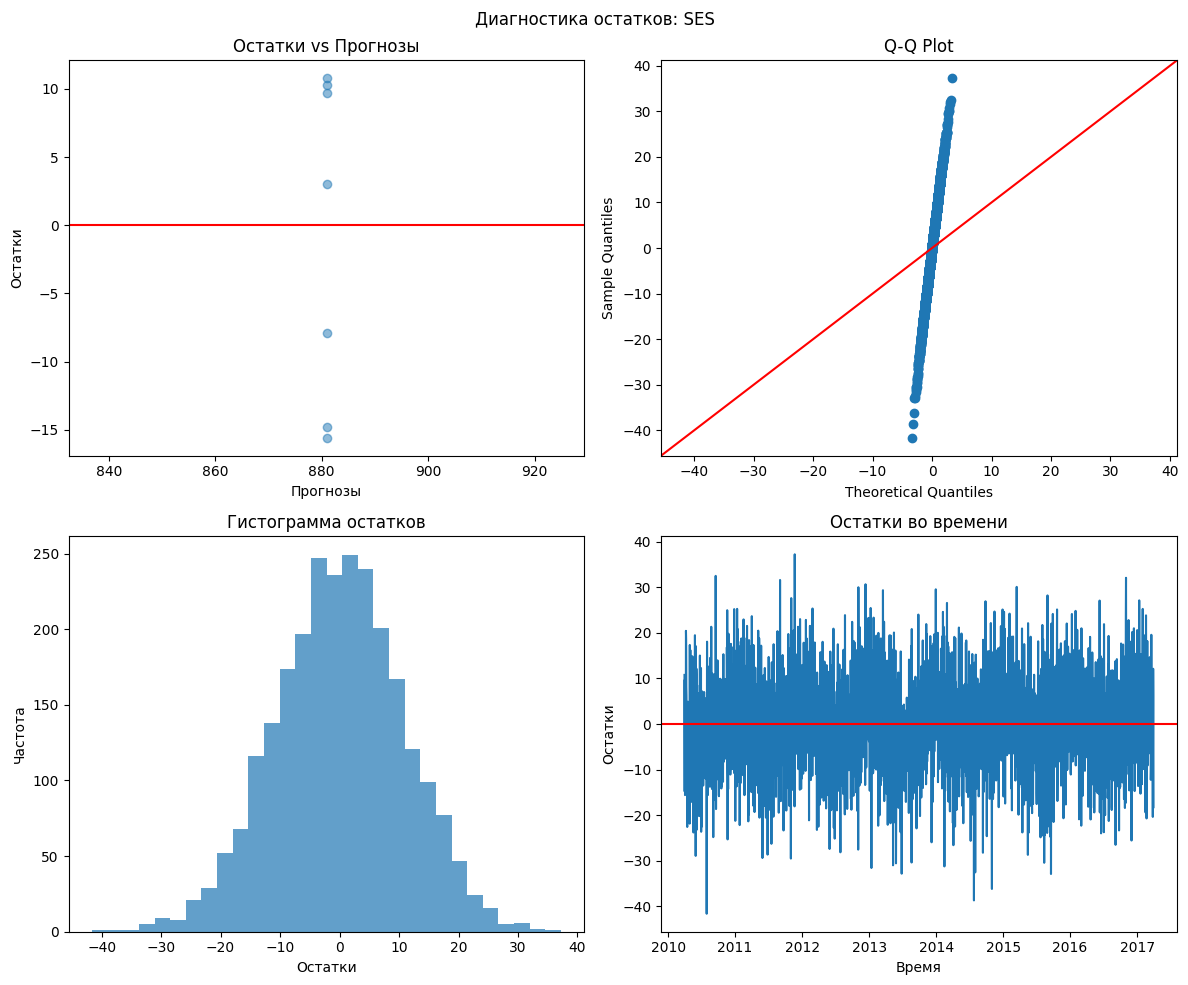


Хольт (аддитивный):
------------------------------
MAE: 2.9130
RMSE: 4.8558
Доверительные интервалы: не поддерживается
Тест Льюнга-Бокса (p-value): 0.3065
Тест Шапиро-Уилка (p-value): 0.1422


c:\Users\DmitrievMS\PycharmProjects\pythonProject\ml_nlp_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


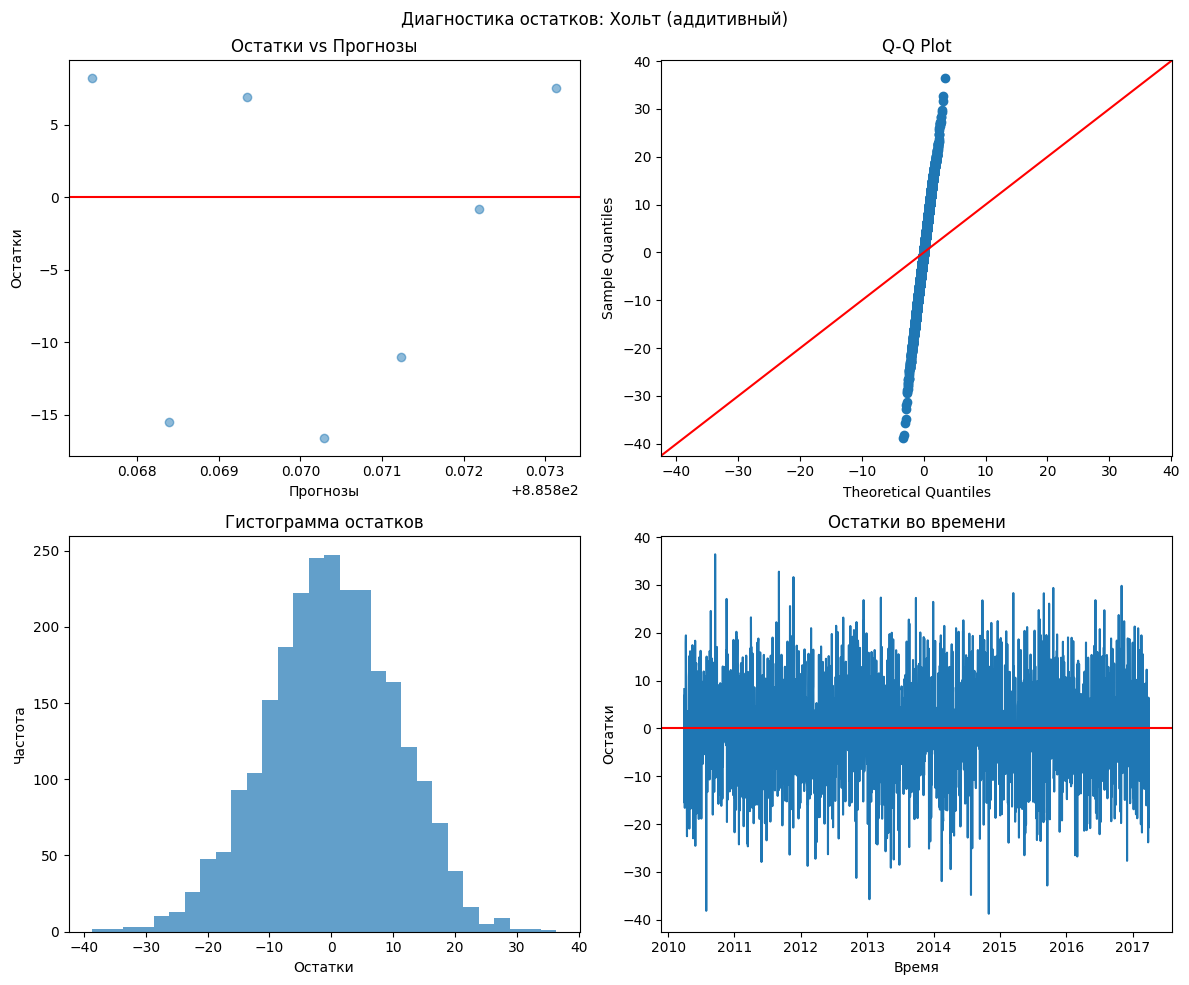


Хольт (мультипликативный):
------------------------------
MAE: 2.9050
RMSE: 4.8618
Доверительные интервалы: не поддерживается
Тест Льюнга-Бокса (p-value): 0.3104
Тест Шапиро-Уилка (p-value): 0.1447


c:\Users\DmitrievMS\PycharmProjects\pythonProject\ml_nlp_venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


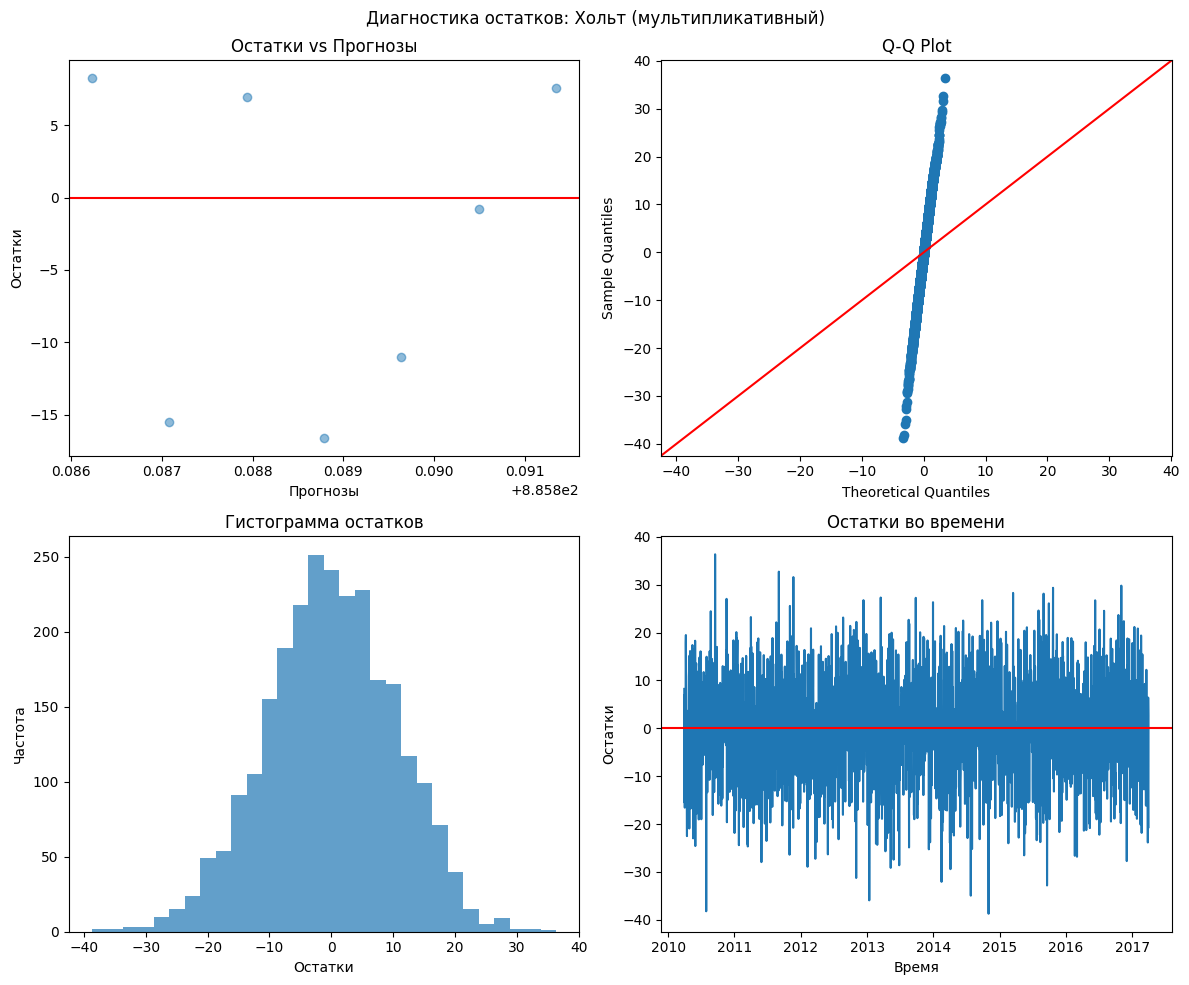


Наивный прогноз:
------------------------------
MAE: 17.2857
RMSE: 17.8846

Сравнение моделей:
                    model       mae      rmse  lb_pvalue  sw_pvalue
                      SES  5.353606  5.700068   0.000060   0.714800
       Хольт (аддитивный)  2.913004  4.855781   0.306468   0.142165
Хольт (мультипликативный)  2.905049  4.861782   0.310398   0.144730
          Наивный прогноз 17.285714 17.884550        NaN        NaN


In [21]:
def ses_model(train, test, h):
    """Simple Exponential Smoothing"""
    model = ExponentialSmoothing(train, trend=None, seasonal=None)
    fitted_model = model.fit()
    forecast = fitted_model.forecast(h)
    return fitted_model, forecast

def holt_additive_model(train, test, h):
    """Holt's Linear Trend (additive)"""
    model = ExponentialSmoothing(train, trend='add', seasonal=None)
    fitted_model = model.fit()
    forecast = fitted_model.forecast(h)
    return fitted_model, forecast

def holt_multiplicative_model(train, test, h):
    """Holt's Linear Trend (multiplicative)"""
    if (train > 0).all():
        model = ExponentialSmoothing(train, trend='mul', seasonal=None)
        fitted_model = model.fit()
        forecast = fitted_model.forecast(h)
        return fitted_model, forecast
    else:
        return None, None

def naive_forecast(train, test, h):
    """Naive forecast (y[t+h] = y[t])"""
    last_value = train.iloc[-1]
    forecast = pd.Series([last_value] * h, index=test.index)
    return None, forecast

def calculate_metrics(test, forecast):
    """Calculate MAE and RMSE"""
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    return mae, rmse

def ljung_box_test(residuals):
    """Ljung-Box test for residual autocorrelation"""
    lb_test = acorr_ljungbox(residuals.dropna(), lags=[10], return_df=True)
    return lb_test['lb_pvalue'].iloc[0]

def shapiro_wilk_test(residuals):
    """Shapiro-Wilk test for normality"""
    stat, p_value = shapiro(residuals.dropna())
    return p_value

def plot_residuals_diagnostics(fitted_model, forecast, test, model_name):
    """Plot residuals diagnostics"""
    if fitted_model is not None:
        residuals = fitted_model.resid
    else:
        residuals = test - forecast
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Диагностика остатков: {model_name}')
    
    # Residuals vs forecasts
    axes[0, 0].scatter(forecast, residuals[:len(forecast)], alpha=0.5)
    axes[0, 0].axhline(y=0, color='r', linestyle='-')
    axes[0, 0].set_xlabel('Прогнозы')
    axes[0, 0].set_ylabel('Остатки')
    axes[0, 0].set_title('Остатки vs Прогнозы')
    
    # Q-Q plot
    sm.qqplot(residuals.dropna(), line='45', ax=axes[0, 1])
    axes[0, 1].set_title('Q-Q Plot')
    
    # Residuals histogram
    axes[1, 0].hist(residuals.dropna(), bins=30, alpha=0.7)
    axes[1, 0].set_xlabel('Остатки')
    axes[1, 0].set_ylabel('Частота')
    axes[1, 0].set_title('Гистограмма остатков')
    
    # Residuals over time
    axes[1, 1].plot(residuals)
    axes[1, 1].axhline(y=0, color='r', linestyle='-')
    axes[1, 1].set_xlabel('Время')
    axes[1, 1].set_ylabel('Остатки')
    axes[1, 1].set_title('Остатки во времени')
    
    plt.tight_layout()
    plt.show()

def main_exponential_smoothing(df, target_col='number_sold', h=7):
    """Main function for exponential smoothing models"""
    # Split data
    split_idx = int(len(df) * 0.8)
    train = df[target_col].iloc[:split_idx]
    test = df[target_col].iloc[split_idx:split_idx + h]
    
    models = {
        'SES': ses_model,
        'Хольт (аддитивный)': holt_additive_model,
        'Хольт (мультипликативный)': holt_multiplicative_model,
        'Наивный прогноз': naive_forecast
    }
    
    results = []
    
    for model_name, model_func in models.items():
        print(f"\n{model_name}:")
        print("-" * 30)
        
        fitted_model, forecast = model_func(train, test, h)
        
        if forecast is not None:
            # Calculate metrics
            mae, rmse = calculate_metrics(test, forecast)
            print(f"MAE: {mae:.4f}")
            print(f"RMSE: {rmse:.4f}")
            
            # Model diagnostics
            if fitted_model is not None:
                # Confidence intervals
                if hasattr(fitted_model, 'forecast'):
                    try:
                        conf_int = fitted_model.get_forecast(h).conf_int()
                        print(f"Доверительные интервалы: {conf_int.values}")
                    except:
                        print("Доверительные интервалы: не поддерживается")
                
                # Ljung-Box test
                lb_pvalue = ljung_box_test(fitted_model.resid)
                print(f"Тест Льюнга-Бокса (p-value): {lb_pvalue:.4f}")
                
                # Shapiro-Wilk test
                sw_pvalue = shapiro_wilk_test(fitted_model.resid)
                print(f"Тест Шапиро-Уилка (p-value): {sw_pvalue:.4f}")
                
                # Store results
                results.append({
                    'model': model_name,
                    'mae': mae,
                    'rmse': rmse,
                    'lb_pvalue': lb_pvalue,
                    'sw_pvalue': sw_pvalue,
                    'fitted_model': fitted_model,
                    'forecast': forecast
                })
                
                # Plot diagnostics
                plot_residuals_diagnostics(fitted_model, forecast, test, model_name)
            else:
                # For naive forecast
                results.append({
                    'model': model_name,
                    'mae': mae,
                    'rmse': rmse,
                    'lb_pvalue': None,
                    'sw_pvalue': None,
                    'fitted_model': None,
                    'forecast': forecast
                })
        else:
            print("Модель не применима (данные <= 0)")
    
    # Compare models
    results_df = pd.DataFrame(results)
    print("\nСравнение моделей:")
    print("=" * 50)
    print(results_df[['model', 'mae', 'rmse', 'lb_pvalue', 'sw_pvalue']].to_string(index=False))
    
    return results_df

if __name__ == "__main__":
    df = pd.read_csv('data_with_features.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    results = main_exponential_smoothing(df)